In [1]:
#if not install
pip install numpy
pip install pandas
pip install sklearn
pip install xgboost

In [194]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [177]:
#dark mode for plots
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

For Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/

data.csv	       raw_fighter_details.csv
preprocessed_data.csv  raw_total_fight_data.csv


In [ ]:
data = pd.read_csv('drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,...,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,...,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,...,6.156250,1.781250,1.781250,9.656250,8.093750,58.312500,30.437500,63.312500,23.125000,6.968750,3.656250,5.0000,4.125000,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.718750,10.953125,9.046875,3.390625,3.140625,45.875000,20.281250,36.343750,18.687500,11.328125,8.562500,1.4375,1.171875,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,0.535625,0.57875,0.185,0.16625,0.125,0.1875,0.25,0.0,109.1875,57.9375,50.625,28.4375,170.4375,105.625,74.375,44.25,5.375,1.5,2.0,0.625,77.375,31.375,41.5625,22.625,31.1875,26.1875,7.6875,4.9375,0.625,0.375,...,31.658203,5.683594,4.862305,16.903320,14.203125,85.845703,27.907227,106.913086,48.479492,18.996094,13.970703,35.3125,32.059570,4.489258,2.484375,6.621094,4.015625,141.285156,310.152344,874.380859,30,0,2,0,2,5,6,0,0,0,1,2,2,0,Orthodox,167.64,172.72,1

For locall 

In [2]:
data = pd.read_csv('data/data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [196]:
pr_data = pd.read_csv('data/preprocessed_data.csv')
pr_data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [ ]:
#data.info()
data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [16]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 5884
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 4.3+ MB


In [14]:
data.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [4]:
data.shape

(6012, 144)

Red     2397
Blue    1424
Draw      69
Name: Winner, dtype: int64


<AxesSubplot:ylabel='Winner'>

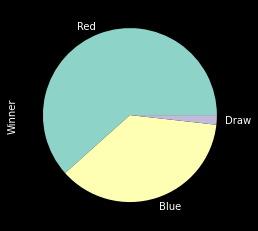

In [183]:
print(data['Winner'].value_counts())
data['Winner'].value_counts().plot(kind='pie')

In [59]:
data['country'] = data['location'].apply(lambda x : x.split(',')[-1])
data['country']

0          USA
1          USA
4          USA
5          USA
6          USA
         ...  
5759       USA
5767     Japan
5799     Japan
5840       USA
5884       USA
Name: country, Length: 3890, dtype: object

<AxesSubplot:title={'center':'countries'}>

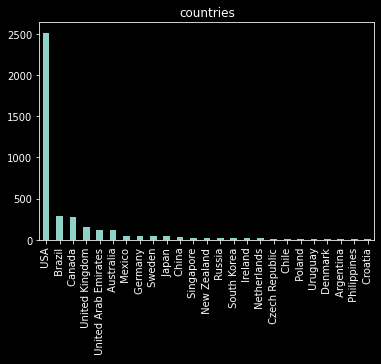

In [179]:
data['country'].value_counts().plot(kind='bar', title='countries')

In [75]:
data['fighters'] = pd.concat([data['R_fighter'], data['B_fighter']], ignore_index=True)


<AxesSubplot:title={'center':'fighters with the max of fights'}>

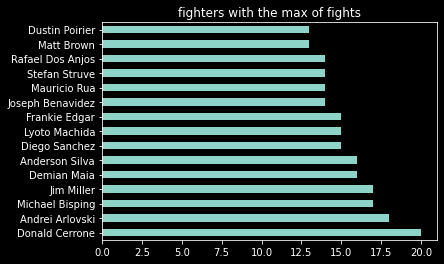

In [180]:
data['fighters'].value_counts().head(15).plot(kind='barh', title='fighters with the max of fights')


In [105]:
data['year'] = data['date'].apply(lambda x : x.split('-')[0])

<AxesSubplot:title={'center':'number of fights per year'}>

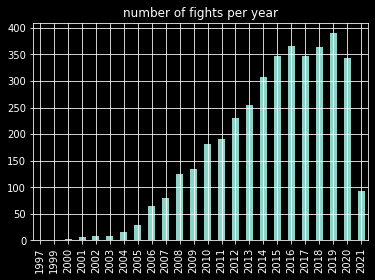

In [176]:
data['year'].value_counts().sort_index().plot(kind='bar',
                                                grid=True,
                                                title='number of fights per year')

<AxesSubplot:title={'center':'age of fighters'}>

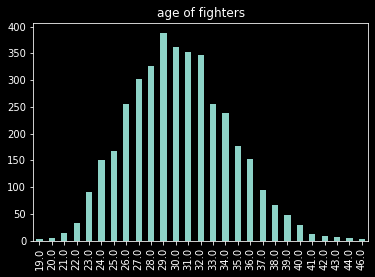

In [175]:
data['age'] = pd.concat([data['R_age'], data['B_age']], ignore_index=True)
data['age'].astype(int)
data['age'].value_counts().sort_index().plot(kind='bar', title='age of fighters')

Last fight recorded on this dataset was 20 March 2021

In [161]:
last_fight = data.loc[0, ['date']]
print(last_fight)

date    2021-03-20
Name: 0, dtype: object


Data Cleaning

Before April 2001, there were almost no rules in UFC (no judges, no time limits, no rounds, etc.). It's up to this precise date that UFC started to implement a set of rules known as "Unified Rules of Mixed Martial Arts". Therefore, we delete all fights before this major update in UFC's rules history.

In [ ]:
limit_date = '2001-04-01'
data = data[(data['date'] > limit_date)]
print(data.shape)

(5758, 144)


In [197]:
y = pr_data['Winner']
X = pr_data.drop(columns= 'Winner')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Base Model - XGBoost

In [200]:
%%time
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Kruzhilin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 66.40%
Wall time: 1.87 s
